In [86]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import keras.layers as ly

In [87]:
# loading dataset
mnist = keras.datasets.mnist

In [88]:
#Data Preprocessing
(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_train=x_train.reshape((60000,28,28,1))
x_test=x_test.reshape((10000,28,28,1))

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [89]:
# Adding the layers and building the architecture
model = keras.models.Sequential();

model.add(ly.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(ly.MaxPooling2D(2,2))
model.add(ly.Conv2D(64, (3,3), activation = 'relu'))
model.add(ly.MaxPooling2D(2,2))
model.add(ly.Conv2D(64, (3,3), activation='relu'))
model.add(ly.Flatten())
model.add(ly.Dense(64, activation = 'relu'))
model.add(ly.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_9 (Flatten)         (None, 576)              

In [90]:
# setting optimizers, lossses , etc...
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [91]:
# training the model
model.fit(x_train, y_train, epochs=5,batch_size=60)

Epoch 1/5
1000/1000 [==============================] - 10s 6ms/step - loss: 0.1593 - accuracy: 0.9500
Epoch 2/5
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0462 - accuracy: 0.9858
Epoch 3/5
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0321 - accuracy: 0.9899
Epoch 4/5
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0241 - accuracy: 0.9925
Epoch 5/5
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0185 - accuracy: 0.9942


In [92]:
# Testing the Model ...
loss, acc = model.evaluate(x_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', acc*100)

313/313 [==============================] - 1s 3ms/step - loss: 0.0293 - accuracy: 0.9923
Test loss: 0.02927832305431366
Test accuracy: 99.22999739646912


In [93]:
# predicting ...

predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


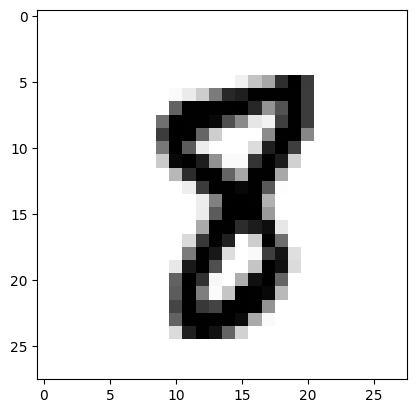


Predicted Output= 8


In [94]:
idx = 5478
plt.imshow(x_test[idx],cmap='gray_r')
plt.show()
print()
print("Predicted Output=",np.argmax(predictions[idx]))

In [95]:
model.save('mnist_model_cnn')